<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/outlier_treatment_iqr%26_boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving placement 0.csv to placement 0.csv


In [3]:
df= pd.read_csv('placement 0.csv')

In [4]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

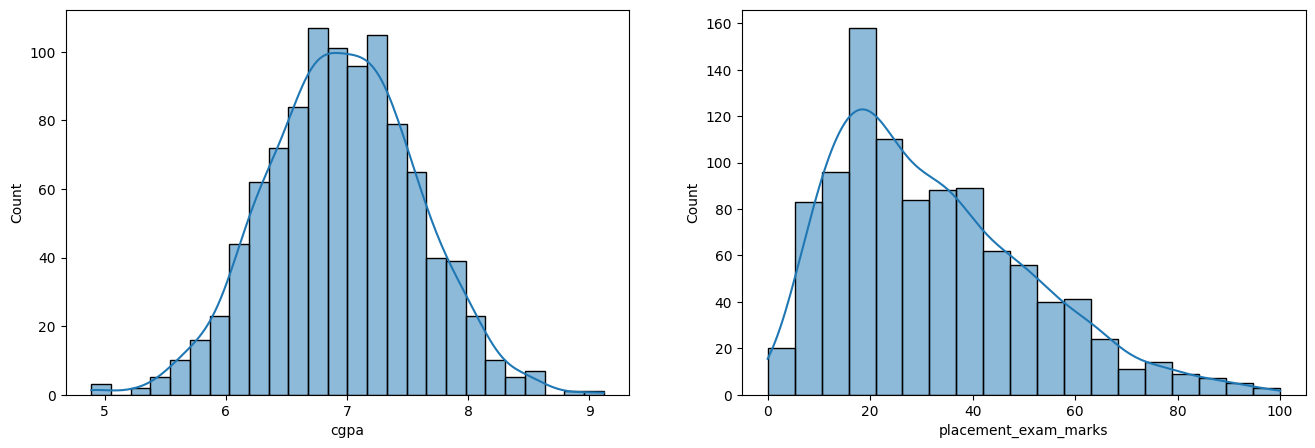

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

In [6]:
df.isnull().sum()

,0
cgpa,0
placement_exam_marks,0
placed,0


In [7]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


# PLOTTING

<Axes: ylabel='placement_exam_marks'>

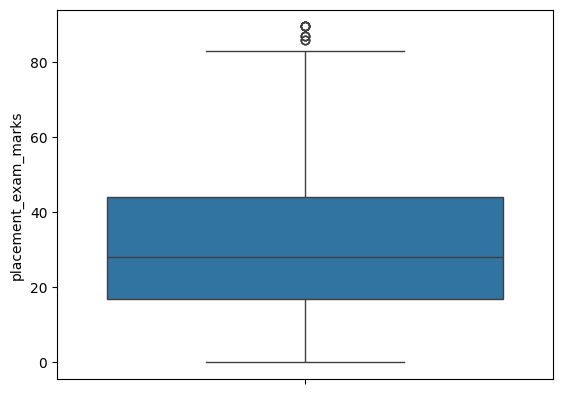

In [38]:
sns.boxplot(df['placement_exam_marks'])

FINDING THE INTERQUARTILERANGE

we will find the quater 1 (25%) and quater 3 (75%) in the below code:

In [19]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)
print("Quartile1=",percentile25,"Quartile3=",percentile75)

Quartile1= 17.0 Quartile3= 44.0


to find the interquartile range we will subtract quartile 3 (75%) from quartile 1 (25%):

In [20]:
iqr = percentile75 - percentile25

In [21]:
iqr

27.0

LIMIT THE DATA

the formula goes like:-


max = Q3 + 1.5 * iqr


min = Q1 - 1.5 * iqr

In [22]:
min= percentile25 - 1.5*iqr
max= percentile75 + 1.5*iqr

In [24]:
print("max=",max,"min=",min)

max= 84.5 min= -23.5


# TRIMMING

In [25]:
new_df = df[(df['placement_exam_marks']<84.5 ) & (df['placement_exam_marks'] > -23.5 )]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


Text(0.5, 1.0, 'trimmed data after iqr')

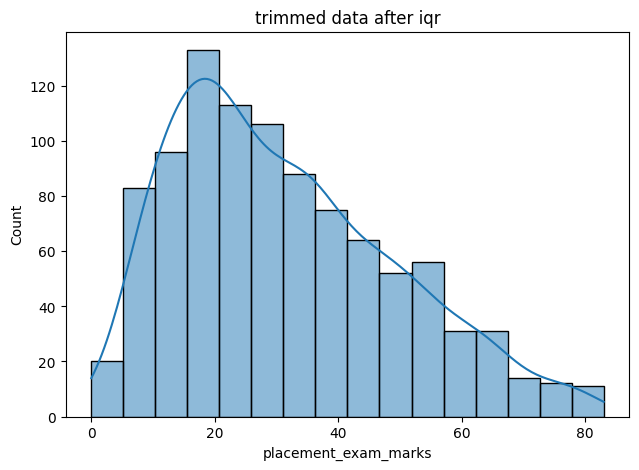

In [35]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,2)
sns.histplot(new_df['placement_exam_marks'],kde=True)
plt.title("trimmed data after iqr")

# CAPPING

here we find the upper and lower lit by giving the formula :-   



upper= x(mean) + 3* x(standar deviation)


lower= x(mean) - 3* x(standar deviation)


In [28]:
upper = df['placement_exam_marks'].mean() + 3*df['placement_exam_marks'].std()
lower = df['placement_exam_marks'].mean() - 3*df['placement_exam_marks'].std()

In [29]:
print("upper=",upper,"lower=",lower)

upper= 89.61746701676336 lower= -25.16746701676336


here we cap the data by putting the upper and lower limits and make new plot

In [30]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upper,
    upper,
    np.where(
        df['placement_exam_marks']<lower,
        lower,
        df['placement_exam_marks']
    )
)

In [31]:
df.shape

(1000, 3)

In [32]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.191940
std,19.025096
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,89.617467


# PLOTTING

Text(0.5, 1.0, 'capped data after iqr')

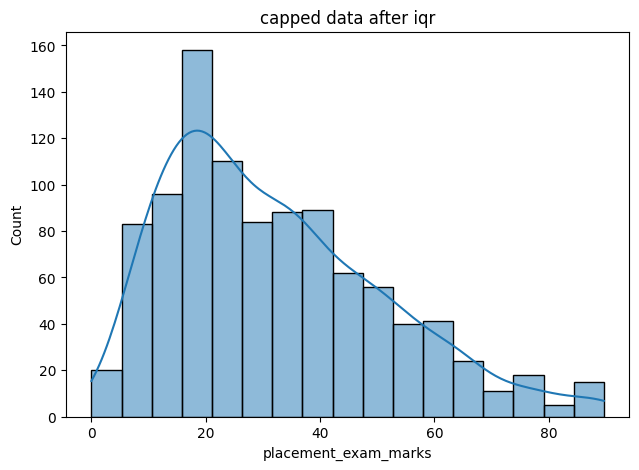

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)
plt.title("capped data after iqr")